<a href="https://colab.research.google.com/github/Yufanzh/time_series_analysis/blob/main/sarima_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SARIMA-- seasonal autoregressive integrated moving average


In [1]:
# ARIMA(p, q, d)
# if autocorrelation plot shows positive auto at first lag, suggest use AR term
# if autocorrelation plot shows negative auto at first lag, suggest use MA term
# p: the number of lags observations including the model
# d: the number of times that the raw observations are differenced
# q: the size of the moving average window, also called the order of moving average

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
%pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00


In [7]:
df = pd.read_csv('./co2_mm_mlo.csv')

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [14]:
df['date'] = pd.to_datetime({'year':df['year'], 'month': df['month'], 'day': 1})

In [15]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [18]:
df2 = df.set_index('date')

In [19]:
df2.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [20]:
df2.index.freq = 'MS'

In [21]:
df2.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<Axes: xlabel='date'>

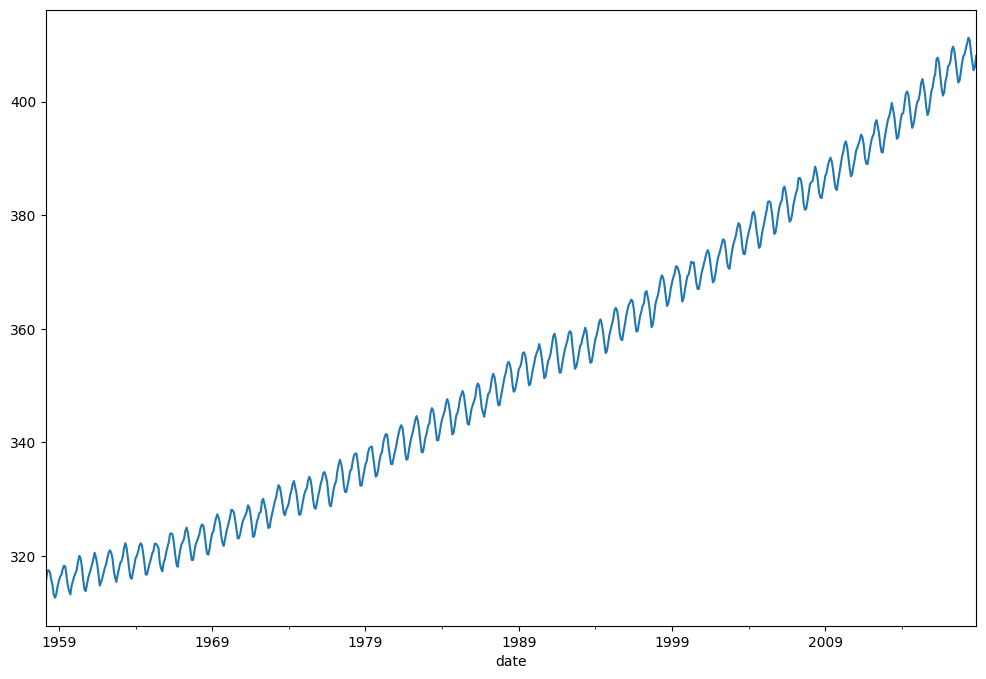

In [23]:
# plot out the data, but average is missing data
df2['interpolated'].plot(figsize=(12,8))

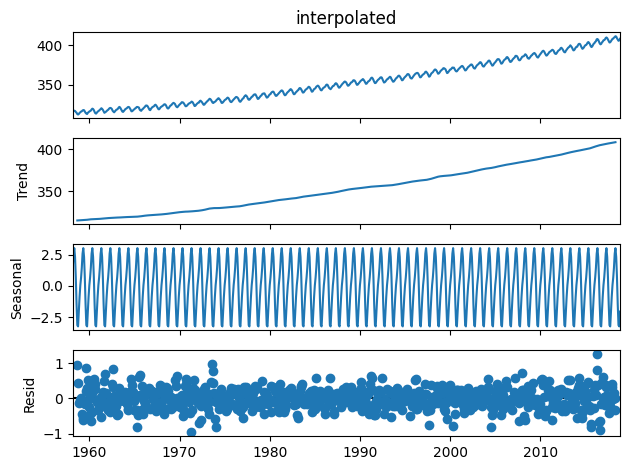

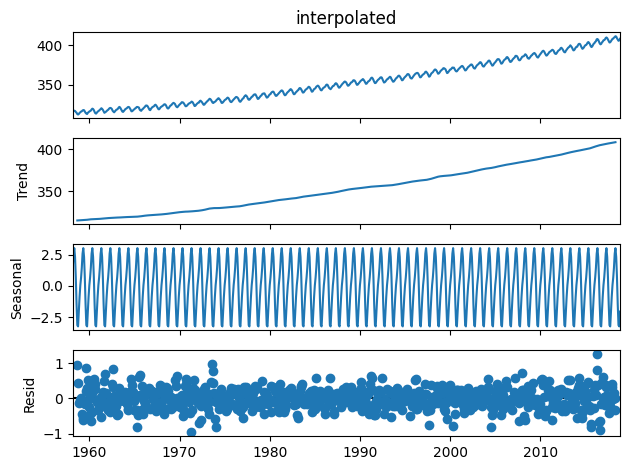

In [24]:
result = seasonal_decompose(df2['interpolated'], model='add')
result.plot()

<Axes: xlabel='date'>

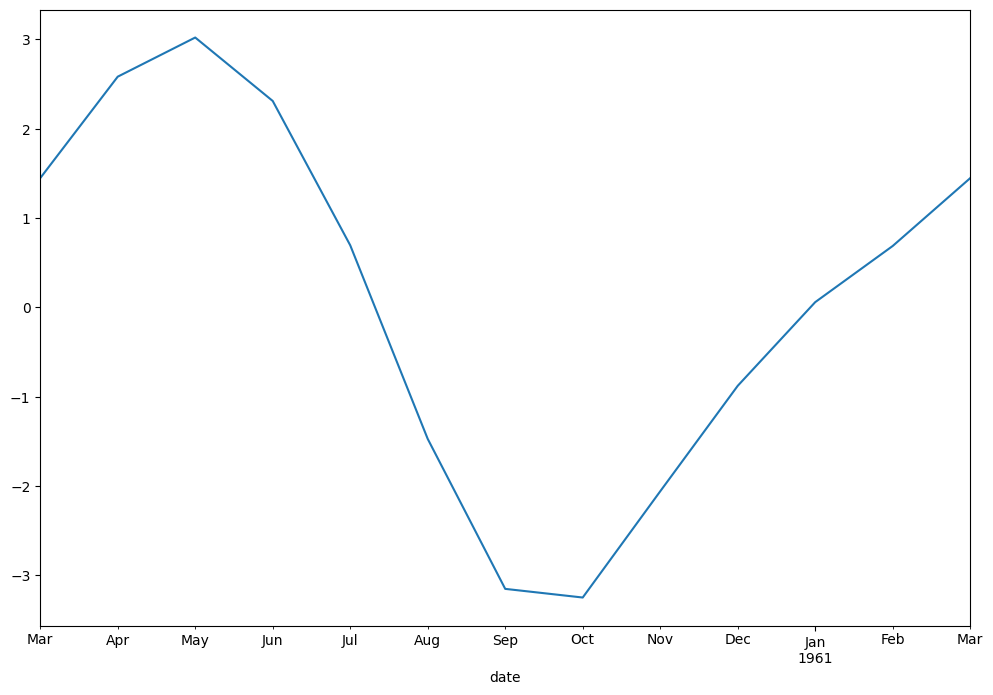

In [26]:
result.seasonal.plot(figsize=(12,8), xlim=['1960-03-01','1961-03-01'])

In [27]:
auto_arima(df2['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.256
Date:                            Wed, 13 Mar 2024   AIC                            424.512
Time:                                    02:18:24   BIC                            452.053
Sample:                                03-01-1958   HQIC                           435.139
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3509      0.104      3.363      0.001       0.146       0.555
ar.L2          0.0868      0.059      1.483      0.138      -0.028       0.201
ma.L1         -0.7060      0.107     -6.607      0.000      -0.915      -0.497
ar.S.L12       0.9996      0.000   2924.672      0.000       0.999       1.000
ma.S.L12      -0.8659      0.021    -40.954      0.000      -0.907      -0.824
sigma2         0.0957      0.005     20.447      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# train the model, use one year as the test
len(df2)

729

In [29]:
# prompt: split the df2 to train and test, with test using the last one year data

train = df2.iloc[:len(df2)-12]
test = df2.iloc[len(df2)-12:]


In [30]:
model = SARIMAX(train['interpolated'],order=(2,1,1), seasonal_order=(1, 0, 1, 12))
result2 = model.fit()

In [32]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.901
Date:                            Wed, 13 Mar 2024   AIC                            415.801
Time:                                    02:28:55   BIC                            443.243
Sample:                                03-01-1958   HQIC                           426.398
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3469      0.071      4.864      0.000       0.207       0.487
ar.L2          0.0814      0.021      3.884      0.000       0.040       0.122
ma.L1         -0.7019      0.059    -11.958      0.000      -0.817      -0.587
ar.S.L12       0.9996      0.000   2867.395      0.000       0.999       1.000
ma.S.L12      -0.8650      0.023    -38.250      0.000      -0.909      -0.821
sigma2         0.0951      0.005     20.412      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.65
Prob(Q):                              0.82   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start = len(train)
end = len(train) + len(test) - 1

In [34]:
prediction = result2.predict(start, end, type='levels').rename('SARIMA Predictions')

<Axes: xlabel='date'>

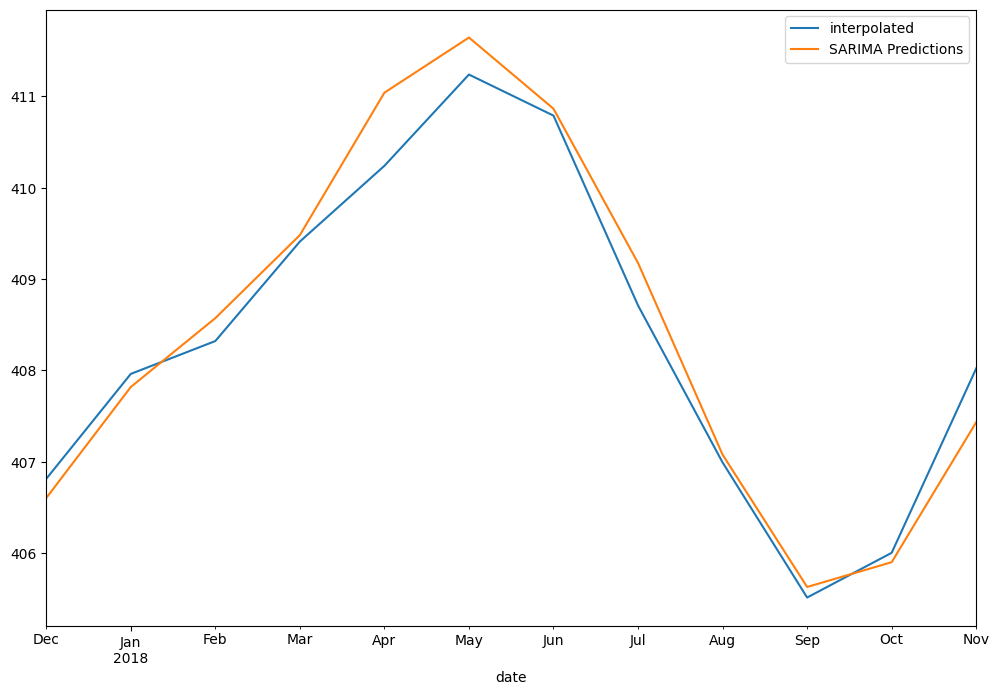

In [35]:
test['interpolated'].plot(figsize=(12,8), legend = True)
prediction.plot(legend=True)

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
error = rmse(test['interpolated'], prediction)

In [38]:
error

0.3581591601097809

In [39]:
test['interpolated'].mean()

408.3333333333333

In [40]:
# train the model on the full data

## FORECAST INTO THE UNKNOWN FUTURE

In [41]:
model = SARIMAX(df2['interpolated'], order=(2,1,1), seasonal_order=(1, 0, 1, 12))
fnl_res = model.fit()

In [42]:
fcast = fnl_res.predict(len(df2), len(df2)+11, type='levels').rename('SARIMA FORECAST')

<Axes: xlabel='date'>

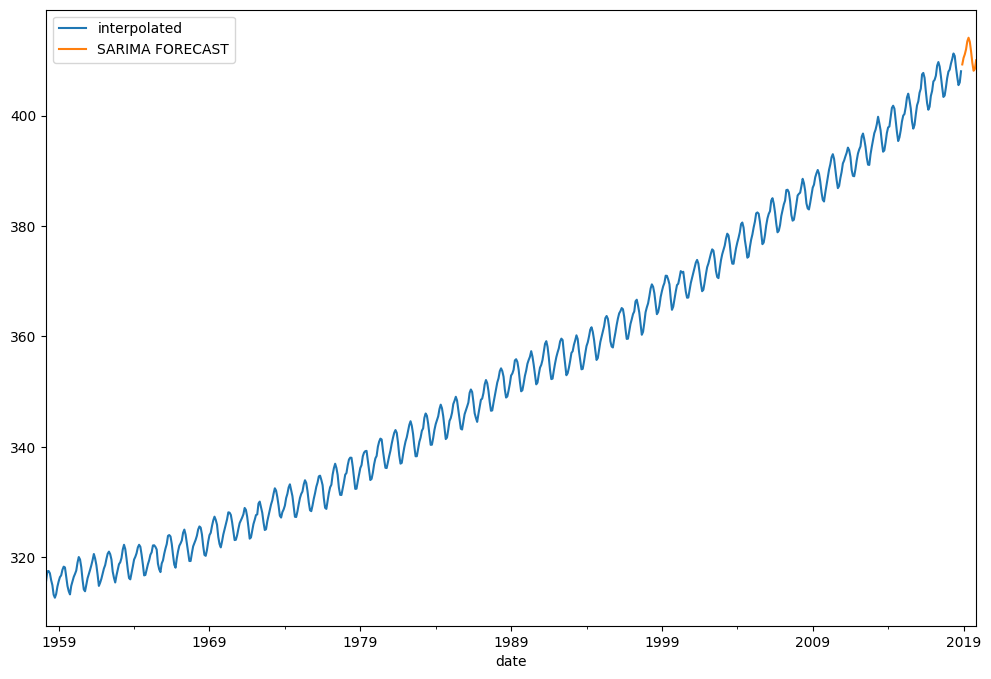

In [43]:
df2['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)